In [154]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

TOPIC: Predictive Analysis of FAANG companies from

With these companies dominating and revolutioning the tech market. Meta(Facebook), Amazon, Apple, Netflix and Google, popularily known as FAANG have revolutionized the tech industry like no others. Their dominance in the markets have led to a large number of investors and analysts 

1. DATA COLLECTION                

First, we will collect data regarding these companies from the past 7 years from May 15, 2017 until May 15, 2024. The respective csv files for each companies companies the stock prices for each day including the opening price, highest and lowest price in the day, adjusted closing price and the volume of shares traded during the day. For the sake of simplicity, we will not be utilizing the adjusted closing price. 

In [155]:
import pandas as pd

meta_csv = pd.read_csv("meta.csv", sep=",")
apple_csv = pd.read_csv("aapl.csv", sep=",")
amazon_csv = pd.read_csv("amzn.csv", sep=",")
netflix_csv = pd.read_csv("nflx.csv", sep=",")
google_csv = pd.read_csv("goog.csv", sep=",")

def calculate_yearly_change(df):
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
    df = df.set_index('Date')  # Set the Date column as the index
    start_dates = df.resample('Y').first()  # Resample yearly and get the first date, replace 'Y' with 'YE'
    end_dates = df.resample('Y').last()  # Resample yearly and get the last date, replace 'Y' with 'YE'
    # Calculate difference between opening price of the first day and closing price of the last day of each year
    yearly_change = end_dates['Close'] - start_dates['Open']
    return yearly_change

meta_change = pd.DataFrame(calculate_yearly_change(meta_csv), columns=['Change'])
apple_change = pd.DataFrame(calculate_yearly_change(apple_csv), columns=['Change'])
amazon_change = pd.DataFrame(calculate_yearly_change(amazon_csv), columns=['Change'])
netflix_change = pd.DataFrame(calculate_yearly_change(netflix_csv), columns=['Change'])
google_change = pd.DataFrame(calculate_yearly_change(google_csv), columns=['Change'])


/var/folders/8g/jd99j1qj5db4gjqgclhkqpzc0000gn/T/ipykernel_58502/2115555625.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  start_dates = df.resample('Y').first()  # Resample yearly and get the first date, replace 'Y' with 'YE'
/var/folders/8g/jd99j1qj5db4gjqgclhkqpzc0000gn/T/ipykernel_58502/2115555625.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  end_dates = df.resample('Y').last()  # Resample yearly and get the last date, replace 'Y' with 'YE'
/var/folders/8g/jd99j1qj5db4gjqgclhkqpzc0000gn/T/ipykernel_58502/2115555625.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  start_dates = df.resample('Y').first()  # Resample yearly and get the first date, replace 'Y' with 'YE'
/var/folders/8g/jd99j1qj5db4gjqgclhkqpzc0000gn/T/ipykernel_58502/2115555625.py:13: FutureWarning: 'Y' is deprecated and will be removed in a

Yearly Price Change for Meta:
                Change
Date                  
2017-12-31   26.290009
2018-12-31  -46.589997
2019-12-31   76.259995
2020-12-31   66.410004
2021-12-31   61.570007
2022-12-31 -217.959992
2023-12-31  231.139991
2024-12-31  130.220002

Yearly Price Change for Apple:
               Change
Date                 
2017-12-31   3.305000
2018-12-31  -3.105000
2019-12-31  34.689998
2020-12-31  58.630004
2021-12-31  44.050003
2022-12-31 -47.900009
2023-12-31  62.250000
2024-12-31   2.570007

Yearly Price Change for Amazon:
               Change
Date                 
2017-12-31  10.536998
2018-12-31  16.498505
2019-12-31  19.131996
2020-12-31  69.096497
2021-12-31   3.216995
2022-12-31 -83.550003
2023-12-31  66.480003
2024-12-31  34.450012

Yearly Price Change for Netflix:
                Change
Date                  
2017-12-31   31.710007
2018-12-31   71.559998
2019-12-31   64.290008
2020-12-31  214.629974
2021-12-31   63.440002
2022-12-31 -310.729980
2023-12-31  188.8

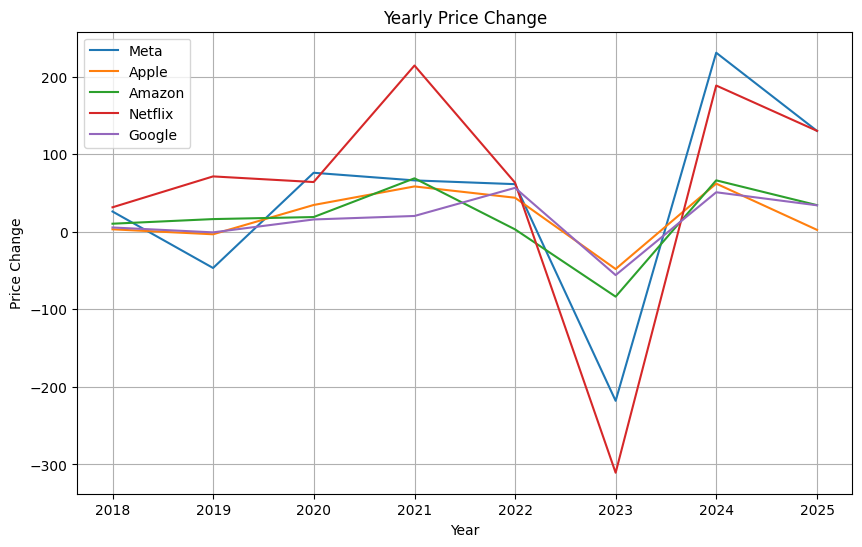

In [156]:
print("Yearly Price Change for Meta:")
print(meta_change)

print("\nYearly Price Change for Apple:")
print(apple_change)

print("\nYearly Price Change for Amazon:")
print(amazon_change)

print("\nYearly Price Change for Netflix:")
print(netflix_change)

print("\nYearly Price Change for Google:")
print(google_change)

plt.figure(figsize=(10, 6))

plt.plot(meta_change.index, meta_change.values, label='Meta')
plt.plot(apple_change.index, apple_change.values, label='Apple')
plt.plot(amazon_change.index, amazon_change.values, label='Amazon')
plt.plot(netflix_change.index, netflix_change.values, label='Netflix')
plt.plot(google_change.index, google_change.values, label='Google')

plt.title('Yearly Price Change')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)

plt.show()

Now to create a predictve analysis of FAANG companies stock in the future, we will be utilizing data from their fiscal year revenue for each year in the time frame mentioned. 

  Fiscal Year End  Revenue (billions)  Change (billions)  Growth (percentage)
0      2023-12-31              134.90              18.29                15.69
1      2022-12-31              116.61              -1.32                -1.12
2      2021-12-31              117.93              31.96                37.18
3      2020-12-31               85.97              15.27                21.60
4      2019-12-31               70.70              14.86                26.61
5      2018-12-31               55.84              15.19                37.35
6      2017-12-31               40.65              13.02                47.09
  Fiscal Year End  Revenue (billions)  Change (billions)  Growth (percentage)
0      2023-09-30              383.29             -11.04                -2.80
1      2022-09-24              394.33              28.51                 7.79
2      2021-09-25              365.82              91.30                33.26
3      2020-09-26              274.52              14.34        

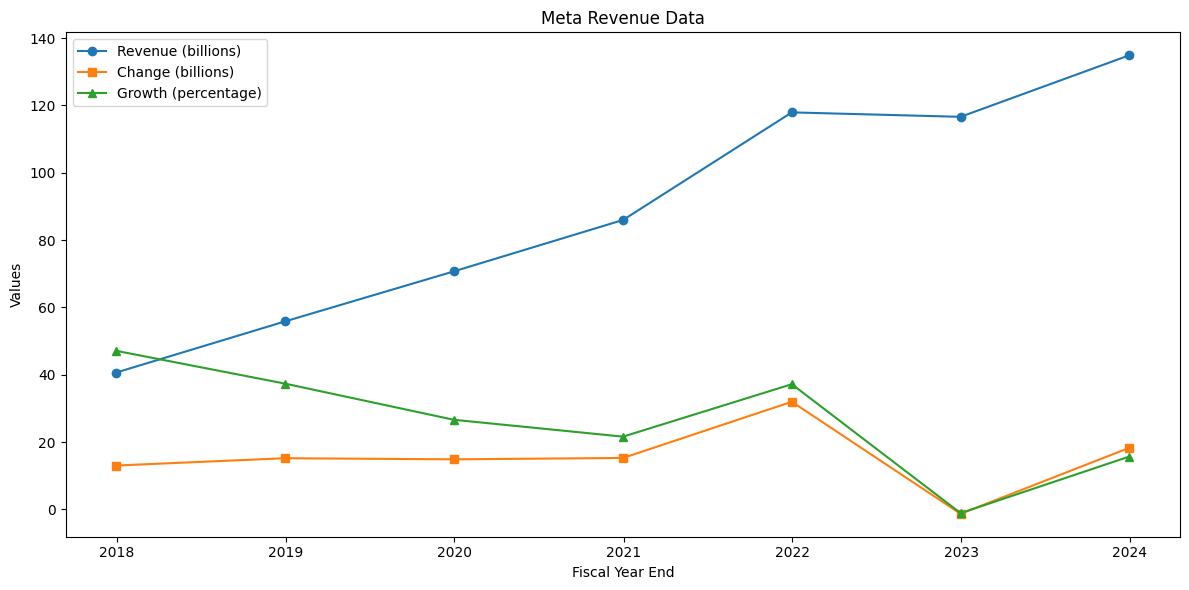

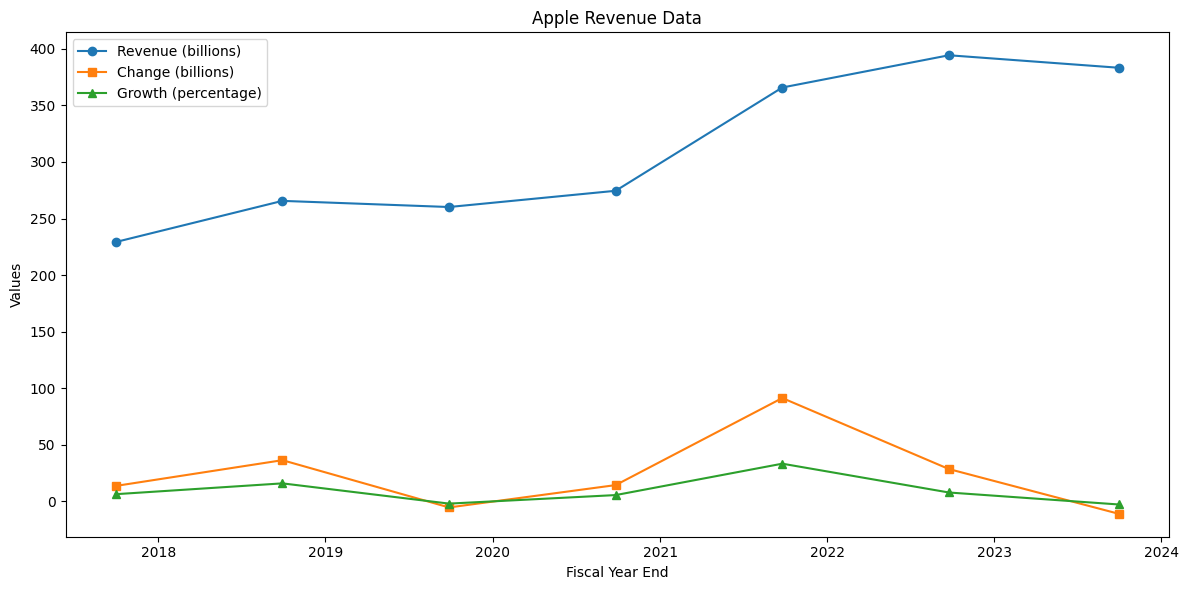

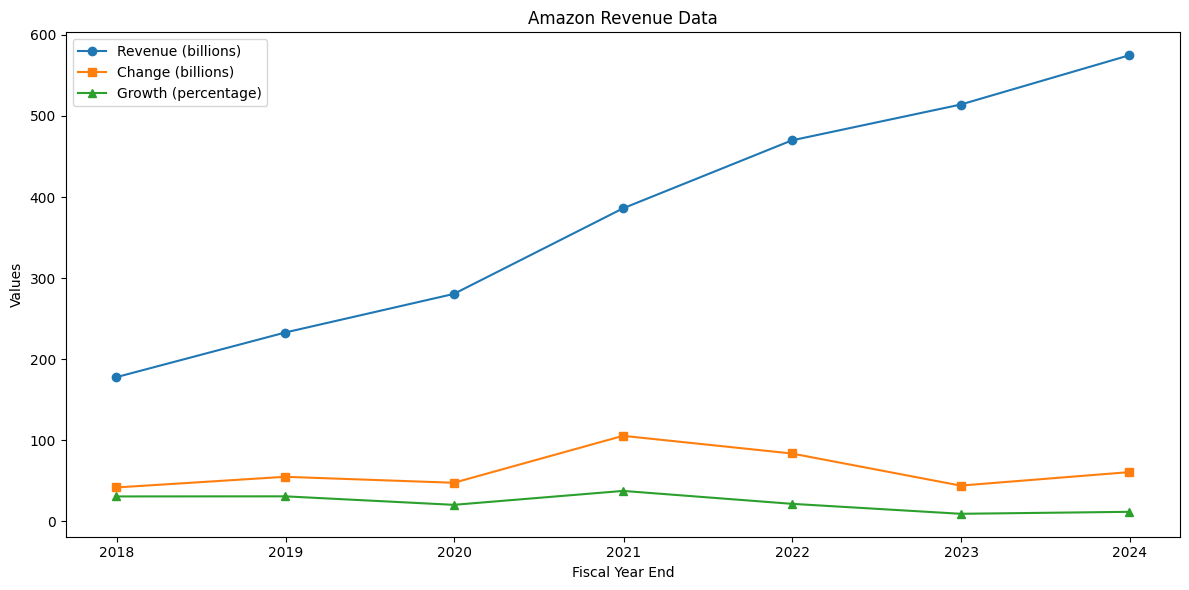

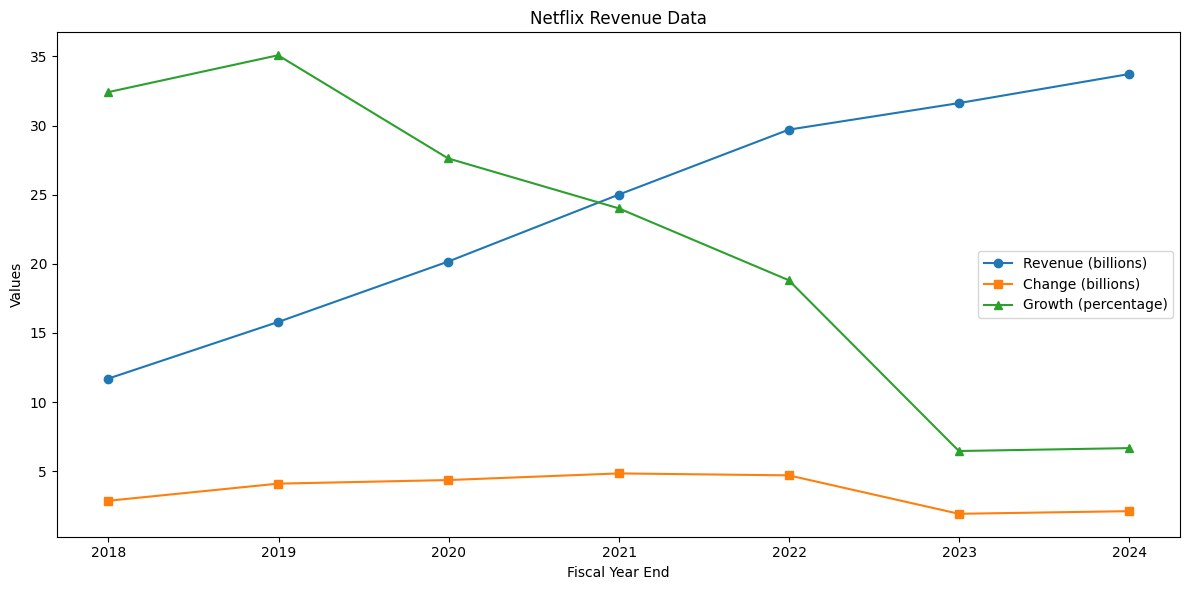

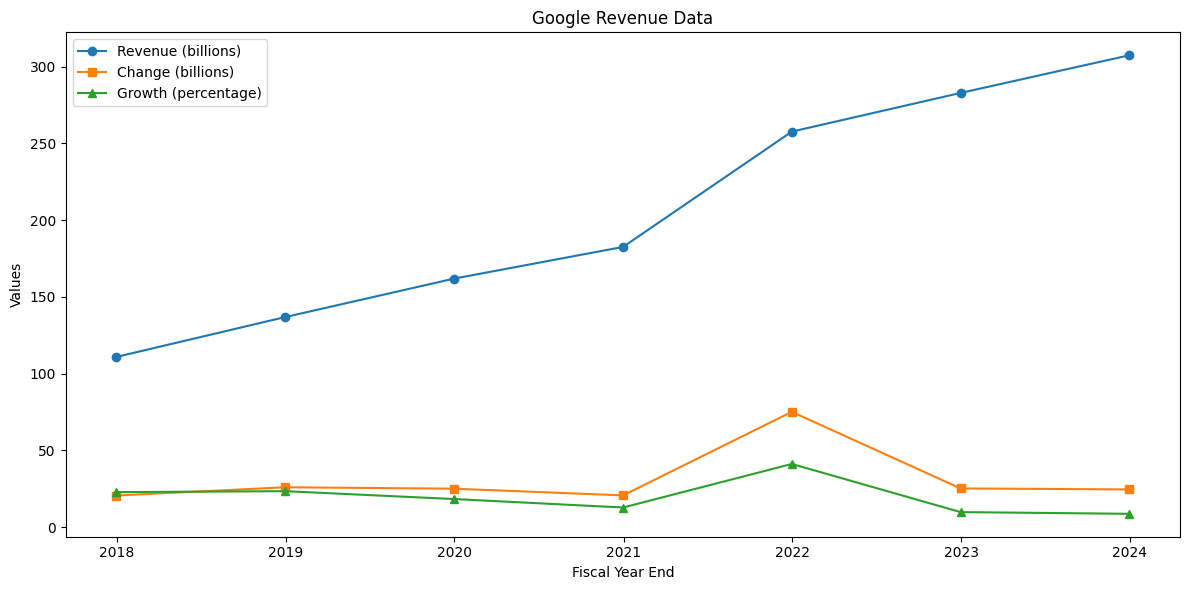

In [157]:
def tableFinder(company):
    url_first_half = 'https://stockanalysis.com/stocks/'
    url_sec_half = '/revenue/#'
    url = url_first_half + company + url_sec_half
    r = requests.get(url)
    cont = r.text
    bsoup = bs(cont, 'html.parser')  
    table = bsoup.find('table')  
    
    if table is None:
        raise ValueError(f"No table found for company {company} on the page.")
    
    col_headers = ['Fiscal Year End', 'Revenue (billions)', 'Change (billions)', 'Growth (percentage)']
    rows = []
    for row in table.find_all('tr')[1:]:  
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        
        if len(cols) >= 2:
            cols[1] = cols[1].replace('B', '').strip()
        if len(cols) >= 3:
            cols[2] = cols[2].replace('B', '').strip()
        if len(cols) >= 4:
            cols[3] = cols[3].replace('%', '').strip()
        
        rows.append(cols)
    
    df = pd.DataFrame(rows, columns=col_headers)
    
    df['Fiscal Year End'] = pd.to_datetime(df['Fiscal Year End'])
    df = df[df['Fiscal Year End'].dt.year >= 2017]
    
    df['Revenue (billions)'] = pd.to_numeric(df['Revenue (billions)'], errors='coerce')
    df['Change (billions)'] = pd.to_numeric(df['Change (billions)'], errors='coerce')
    df['Growth (percentage)'] = pd.to_numeric(df['Growth (percentage)'], errors='coerce')
    
    df['Revenue (billions)'] = df['Revenue (billions)'].astype(float)
    df['Change (billions)'] = df['Change (billions)'].astype(float)
    df['Growth (percentage)'] = df['Growth (percentage)'].astype(float)
    
    return df

meta_rev_table = tableFinder("meta")
apple_rev_table = tableFinder('aapl')
amazon_rev_table = tableFinder('amzn')
netflix_rev_table = tableFinder("nflx")
google_rev_table = tableFinder('goog')

print(meta_rev_table)
print(apple_rev_table)
print(amazon_rev_table)
print(netflix_rev_table)
print(google_rev_table)

def plot_revenue_data(df, company):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Fiscal Year End'], df['Revenue (billions)'], marker='o', label='Revenue (billions)')
    plt.plot(df['Fiscal Year End'], df['Change (billions)'], marker='s', label='Change (billions)')
    plt.plot(df['Fiscal Year End'], df['Growth (percentage)'], marker='^', label='Growth (percentage)')
    plt.xlabel('Fiscal Year End')
    plt.ylabel('Values')
    plt.title(f'{company} Revenue Data')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_revenue_data(meta_rev_table, "Meta"); 
plot_revenue_data(apple_rev_table, "Apple");   
plot_revenue_data(amazon_rev_table, "Amazon"); 
plot_revenue_data(netflix_rev_table, "Netflix"); 
plot_revenue_data(google_rev_table, "Google"); 

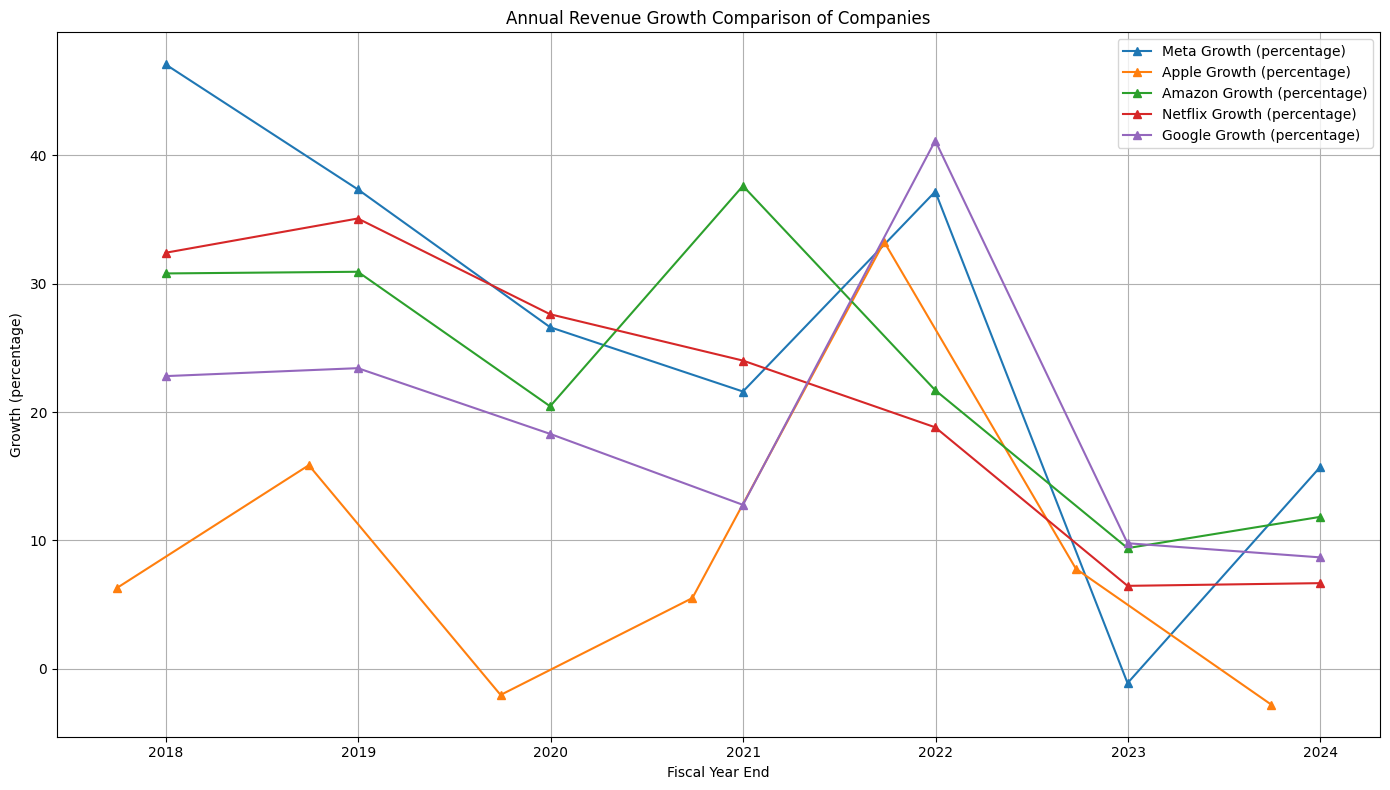

In [158]:
def plot_all_revenue_data(datasets, companies):
    plt.figure(figsize=(14, 8))  
    
    for data, company in zip(datasets, companies):
        plt.plot(data['Fiscal Year End'], data['Growth (percentage)'],
                 marker='^', label=f'{company} Growth (percentage)')

    plt.xlabel('Fiscal Year End')
    plt.ylabel('Growth (percentage)')
    plt.title('Annual Revenue Growth Comparison of Companies')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)  
    plt.show()

datasets = [meta_rev_table, apple_rev_table, amazon_rev_table, netflix_rev_table, google_rev_table]
companies = ["Meta", "Apple", "Amazon", "Netflix", "Google"]

plot_all_revenue_data(datasets, companies)

In [ ]:
def preprocess_data(df):
    df = df[['Fiscal Year End', 'Revenue (billions)']]
    df.rename(columns={'Fiscal Year End': 'Date', 'Revenue (billions)': 'Close'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Days'] = (df.index - df.index.min()).days
    return df

meta_data = preprocess_data(meta_rev_table)
apple_data = preprocess_data(apple_rev_table)
amazon_data = preprocess_data(amazon_rev_table)
netflix_data = preprocess_data(netflix_rev_table)
google_data = preprocess_data(google_rev_table)


In [161]:
train_data = pd.concat([apple_data, amazon_data, netflix_data, google_data])
X_train = train_data[['Days']]
y_train = train_data['Close']

# Use Meta as the test set
X_test = meta_data[['Days']]
y_test = meta_data['Close']

Mean Squared Error: 21038.836435678102
R-squared: -18.669230954342577


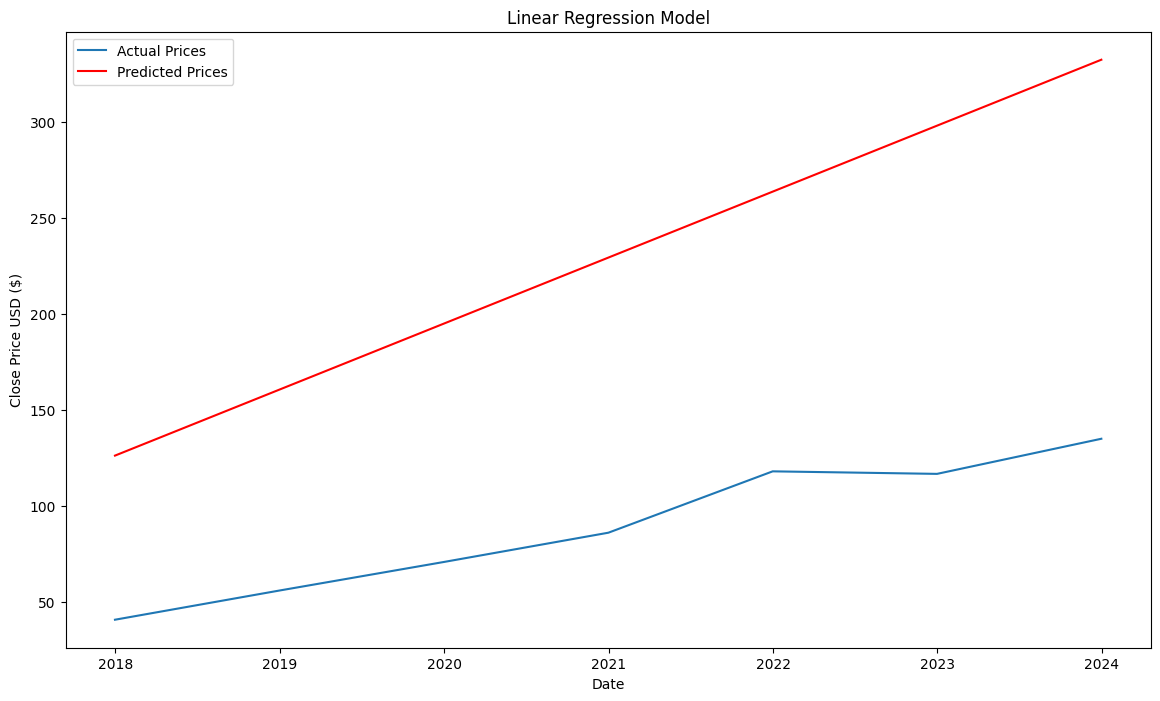

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(14, 8))
plt.title('Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(meta_data.index, y_test, label='Actual Prices')
plt.plot(meta_data.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.show()


Company: Meta
Mean Squared Error: 21038.836435678102
R-squared: -18.669230954342577


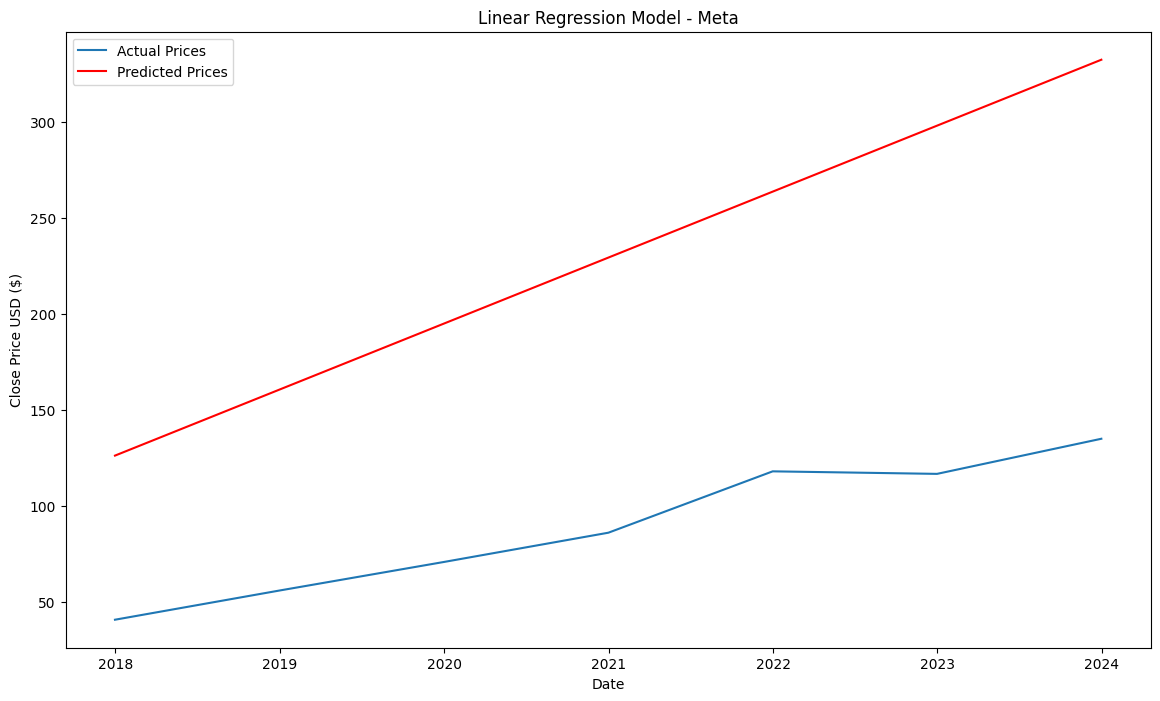


Company: Apple
Mean Squared Error: 19241.613873198516
R-squared: -3.838987028912972


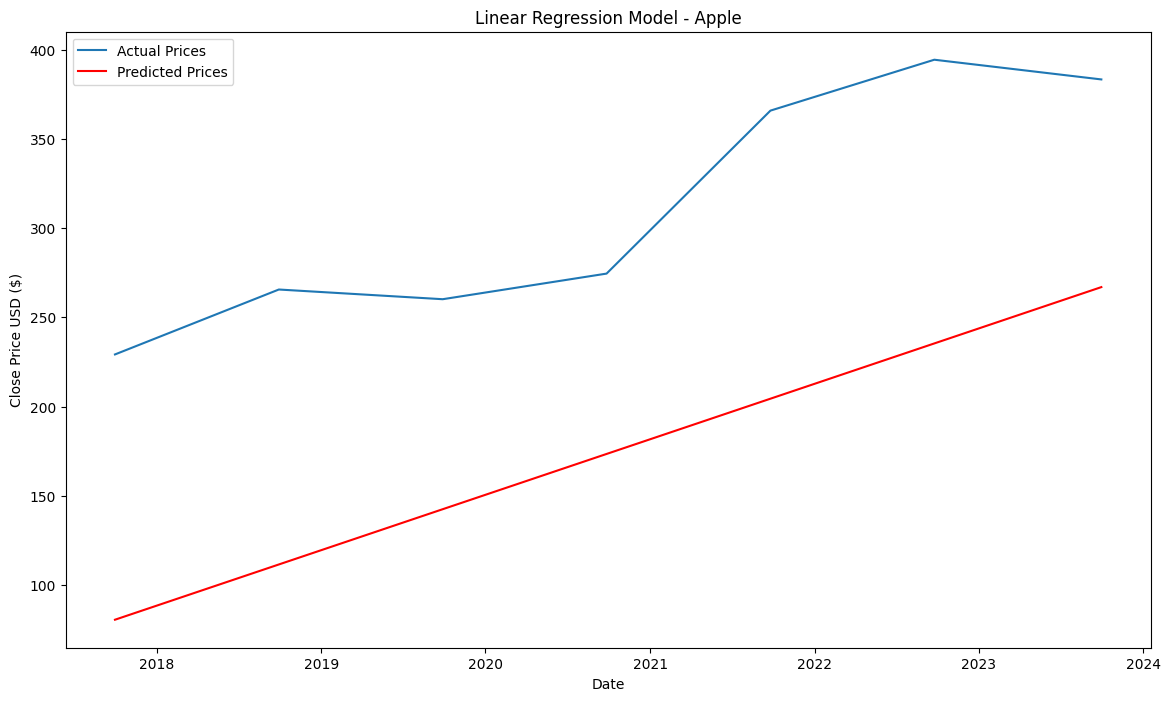


Company: Amazon
Mean Squared Error: 57654.170141052324
R-squared: -1.9607554267630354


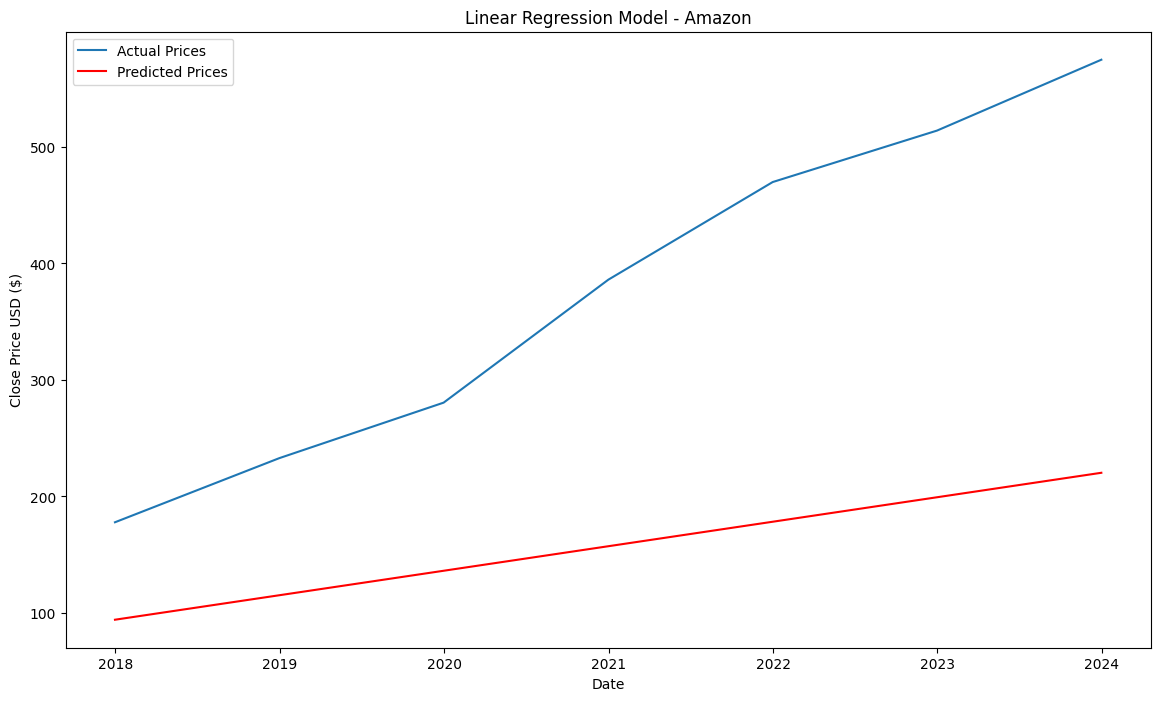


Company: Netflix
Mean Squared Error: 53593.5000976872
R-squared: -892.8550173992271


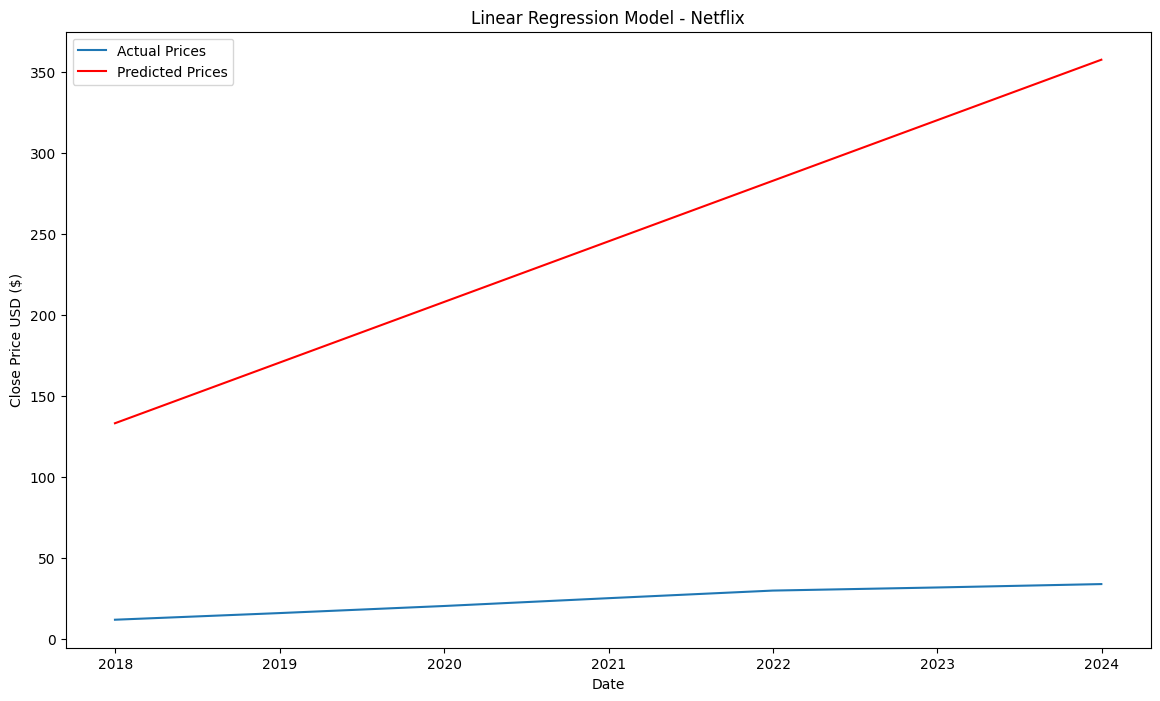


Company: Google
Mean Squared Error: 295.1535906425653
R-squared: 0.9412831211921078


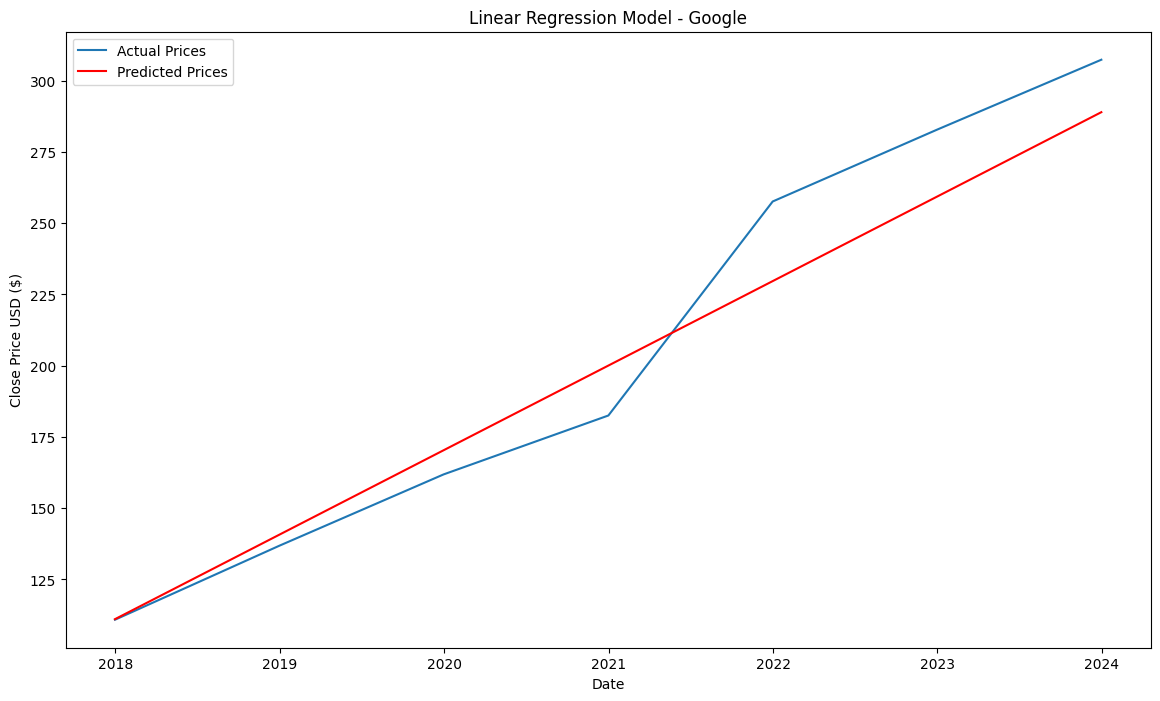

In [163]:
companies = [meta_data, apple_data, amazon_data, netflix_data, google_data]
company_names = ["Meta", "Apple", "Amazon", "Netflix", "Google"]

for i, test_data in enumerate(companies):
    # Combine the training data from the other 4 companies
    train_data = pd.concat([companies[j] for j in range(len(companies)) if j != i])
    X_train = train_data[['Days']]
    y_train = train_data['Close']
    
    # Use one company as the test set
    X_test = test_data[['Days']]
    y_test = test_data['Close']
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'\nCompany: {company_names[i]}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    
    # Plot the results
    plt.figure(figsize=(14, 8))
    plt.title(f'Linear Regression Model - {company_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(test_data.index, y_test, label='Actual Prices')
    plt.plot(test_data.index, y_pred, label='Predicted Prices', color='red')
    plt.legend()
    plt.show()